In [56]:
import sys
sys.path.append('..')
sys.path.append('../..')
import os
from utils import *
from student_utils_sp18 import *
from networkx.algorithms.traversal import *
from networkx.algorithms.approximation import *
from output_validator import *
from vasilis_solver import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [57]:
indirectory = "inputs/"
input_files = os.listdir(indirectory)

In [58]:
def get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix):
    
    name2index = {}
    index2name = {}

    count = 0
    for name in list_of_kingdom_names:
        name2index[name] = count
        index2name[count] = name
        count += 1

    G = adjacency_matrix_to_graph(adjacency_matrix)
    
    color = {}

    for node in G.nodes():
            color[node] = "white"


    conquering_cost = {}
    for node in G.nodes():
        conquering_cost[node] = adjacency_matrix[node][node]

    nx.set_node_attributes(G, conquering_cost, "conquering_cost")
    nx.set_node_attributes(G, color, "color")
    
    return G, name2index[starting_kingdom]

In [4]:
infiles = os.listdir(indirectory)

files50 = []
files100 = []
files200 = []

for input_file in tqdm(infiles):
            input_data = read_file(indirectory+input_file)
            number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix = data_parser(input_data)
            
            G, start_index = get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix)
            
            num_vertices = len(G.nodes())
            
            if num_vertices<=50:
                files50.append(input_file)
            
            elif num_vertices>50 and num_vertices<=100:
                files100.append(input_file)
            else:
                files200.append(input_file)               

100%|██████████| 716/716 [00:13<00:00, 54.44it/s]


In [5]:
# examine the files 50 files

def file_summary(lst):
    """Given a file or list of files returns a lists with stats"""
    
    indirectory = 'inputs/'
    
    num_vertices = []
    num_edges = []
    edges_to_vertices = []
    
    for f in tqdm(lst):
            input_data = read_file(indirectory+f)
            number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix = data_parser(input_data)
            
            G, start_index = get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix)
            
            num_vertices.append(len(G.nodes()))
            num_edges.append(len(nx.edges(G)))
            edges_to_vertices.append(len(nx.edges(G))/len(G.nodes()))      
                                     
    return num_vertices, num_edges, edges_to_vertices

In [6]:
# Analysis for small files

num_vertices, num_edges, edges_to_vertices = file_summary(files50)

100%|██████████| 289/289 [00:01<00:00, 248.97it/s]


/Users/Vasilis/anaconda3/envs/Python_3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


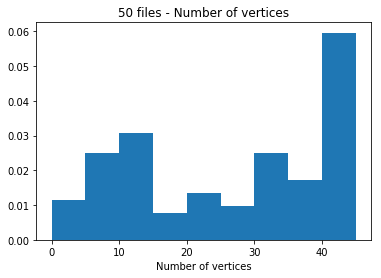

Mean: 41.19723183391003
25th percentile: 39.0
50th percentile: 50.0
75th percentile: 50.0


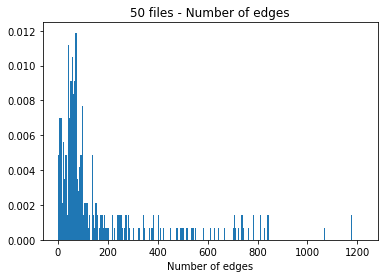

Mean: 41.19723183391003
25th percentile: 48.0
50th percentile: 73.0
75th percentile: 186.0


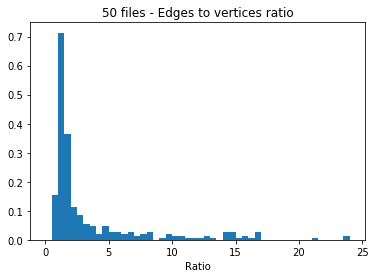

Mean: 3.819374771786477
25th percentile: 1.2058823529411764
50th percentile: 1.7333333333333334
75th percentile: 3.840909090909091


In [7]:
# SMALL GRAPHS VISUALIZATIONS


# number of vertices
plt.hist(num_vertices, normed=True, bins = np.arange(0, 50, 5))
plt.title("50 files - Number of vertices")
plt.xlabel("Number of vertices")
plt.show()

print("Mean: {}".format(np.mean(num_vertices)))
print("25th percentile: {}".format(np.percentile(num_vertices, 25)))
print("50th percentile: {}".format(np.percentile(num_vertices, 50)))
print("75th percentile: {}".format(np.percentile(num_vertices, 75)))

# number of edges

plt.hist(num_edges, normed=True, bins = np.arange(0, max(num_edges), 5))
plt.title("50 files - Number of edges")
plt.xlabel("Number of edges")
plt.show()

print("Mean: {}".format(np.mean(num_vertices)))
print("25th percentile: {}".format(np.percentile(num_edges, 25)))
print("50th percentile: {}".format(np.percentile(num_edges, 50)))
print("75th percentile: {}".format(np.percentile(num_edges, 75)))

# Ratio
plt.hist(edges_to_vertices, normed=True, bins = np.arange(0, max(edges_to_vertices), 0.5))
plt.title("50 files - Edges to vertices ratio")
plt.xlabel("Ratio")
plt.show()

print("Mean: {}".format(np.mean(edges_to_vertices)))
print("25th percentile: {}".format(np.percentile(edges_to_vertices, 25)))
print("50th percentile: {}".format(np.percentile(edges_to_vertices, 50)))
print("75th percentile: {}".format(np.percentile(edges_to_vertices, 75)))

Most of the submissions are very sparse. We will need something that does well on trees.

In [8]:
# check how many graphs are freaking trees

num_trees = 0
for f in tqdm(files50):
        input_data = read_file("inputs/"+f)
        number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix = data_parser(input_data)
            
        G, start_index = get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix)
        
        num_trees+=nx.is_tree(G)

100%|██████████| 289/289 [00:00<00:00, 330.35it/s]


In [9]:
num_trees, len(files50)

(22, 289)

## There are 22 TREES in the sized 50 files

100%|██████████| 222/222 [00:02<00:00, 86.52it/s]
/Users/Vasilis/anaconda3/envs/Python_3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


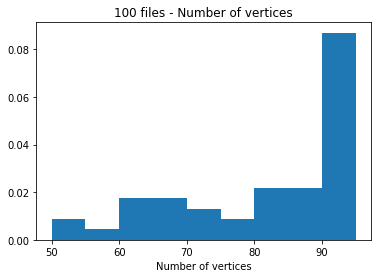

Mean: 95.65765765765765
25th percentile: 96.0
50th percentile: 100.0
75th percentile: 100.0


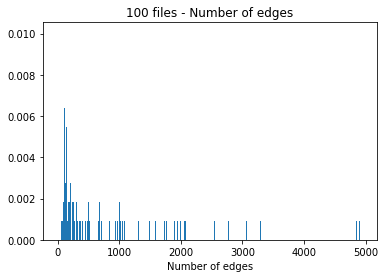

Mean: 95.65765765765765
25th percentile: 131.25
50th percentile: 213.5
75th percentile: 919.75


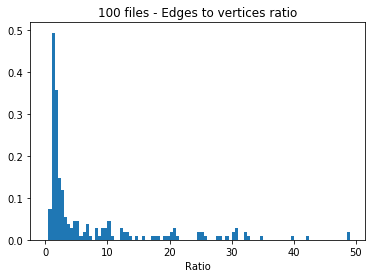

Mean: 7.58767309224127
25th percentile: 1.4333247422680413
50th percentile: 2.2487113402061856
75th percentile: 9.29125


In [10]:
# Medium GRAPH VISUALIZATIONS

num_vertices, num_edges, edges_to_vertices = file_summary(files100)

# number of vertices
plt.hist(num_vertices, normed=True, bins = np.arange(50, 100, 5))
plt.title("100 files - Number of vertices")
plt.xlabel("Number of vertices")
plt.show()

print("Mean: {}".format(np.mean(num_vertices)))
print("25th percentile: {}".format(np.percentile(num_vertices, 25)))
print("50th percentile: {}".format(np.percentile(num_vertices, 50)))
print("75th percentile: {}".format(np.percentile(num_vertices, 75)))

# number of edges

plt.hist(num_edges, normed=True, bins = np.arange(0, max(num_edges), 5))
plt.title("100 files - Number of edges")
plt.xlabel("Number of edges")
plt.show()

print("Mean: {}".format(np.mean(num_vertices)))
print("25th percentile: {}".format(np.percentile(num_edges, 25)))
print("50th percentile: {}".format(np.percentile(num_edges, 50)))
print("75th percentile: {}".format(np.percentile(num_edges, 75)))

# Ratio
plt.hist(edges_to_vertices, normed=True, bins = np.arange(0, max(edges_to_vertices), 0.5))
plt.title("100 files - Edges to vertices ratio")
plt.xlabel("Ratio")
plt.show()

print("Mean: {}".format(np.mean(edges_to_vertices)))
print("25th percentile: {}".format(np.percentile(edges_to_vertices, 25)))
print("50th percentile: {}".format(np.percentile(edges_to_vertices, 50)))
print("75th percentile: {}".format(np.percentile(edges_to_vertices, 75)))

In [11]:
# check how many graphs are freaking trees
num_trees = 0
for f in tqdm(files100):
        input_data = read_file("inputs/"+f)
        number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix = data_parser(input_data)
            
        G, start_index = get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix)
        
        num_trees+=nx.is_tree(G)
        
num_trees

100%|██████████| 222/222 [00:02<00:00, 74.41it/s]


8

100%|██████████| 205/205 [00:09<00:00, 21.00it/s]
/Users/Vasilis/anaconda3/envs/Python_3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


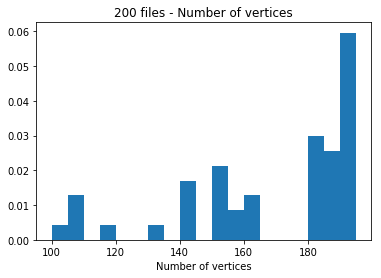

Mean: 192.3219512195122
25th percentile: 196.0
50th percentile: 200.0
75th percentile: 200.0


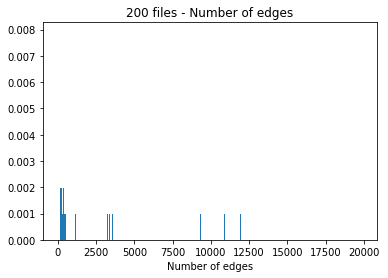

Mean: 192.3219512195122
25th percentile: 269.0
50th percentile: 600.0
75th percentile: 3575.0


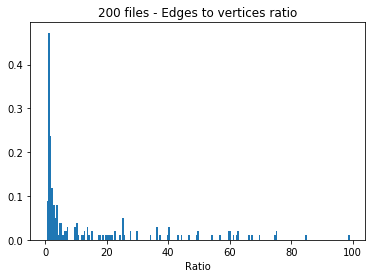

Mean: 14.857570288334557
25th percentile: 1.4489795918367347
50th percentile: 3.015
75th percentile: 20.11


In [12]:
# Medium GRAPH VISUALIZATIONS

num_vertices, num_edges, edges_to_vertices = file_summary(files200)

# number of vertices
plt.hist(num_vertices, normed=True, bins = np.arange(100, 200, 5))
plt.title("200 files - Number of vertices")
plt.xlabel("Number of vertices")
plt.show()

print("Mean: {}".format(np.mean(num_vertices)))
print("25th percentile: {}".format(np.percentile(num_vertices, 25)))
print("50th percentile: {}".format(np.percentile(num_vertices, 50)))
print("75th percentile: {}".format(np.percentile(num_vertices, 75)))

# number of edges

plt.hist(num_edges, normed=True, bins = np.arange(0, max(num_edges), 5))
plt.title("200 files - Number of edges")
plt.xlabel("Number of edges")
plt.show()

print("Mean: {}".format(np.mean(num_vertices)))
print("25th percentile: {}".format(np.percentile(num_edges, 25)))
print("50th percentile: {}".format(np.percentile(num_edges, 50)))
print("75th percentile: {}".format(np.percentile(num_edges, 75)))

# Ratio
plt.hist(edges_to_vertices, normed=True, bins = np.arange(0, max(edges_to_vertices), 0.5))
plt.title("200 files - Edges to vertices ratio")
plt.xlabel("Ratio")
plt.show()

print("Mean: {}".format(np.mean(edges_to_vertices)))
print("25th percentile: {}".format(np.percentile(edges_to_vertices, 25)))
print("50th percentile: {}".format(np.percentile(edges_to_vertices, 50)))
print("75th percentile: {}".format(np.percentile(edges_to_vertices, 75)))

In [13]:
# check how many graphs are freaking trees
num_trees = 0
for f in tqdm(files200):
        input_data = read_file("inputs/"+f)
        number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix = data_parser(input_data)
            
        G, start_index = get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix)
        
        num_trees+=nx.is_tree(G)
        
num_trees

100%|██████████| 205/205 [00:08<00:00, 24.52it/s]


9

In [4]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    plt.figure(3,figsize=(8,8)) 
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    nx.draw(G, pos, with_labels=True)

In [15]:
for f in tqdm(files50):
        input_data = read_file("inputs/"+f)
        number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix = data_parser(input_data)
            
        G, start_index = get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix)
        
        if nx.is_tree(G):
            break
        num_trees+=nx.is_tree(G)

  0%|          | 0/289 [00:00<?, ?it/s]


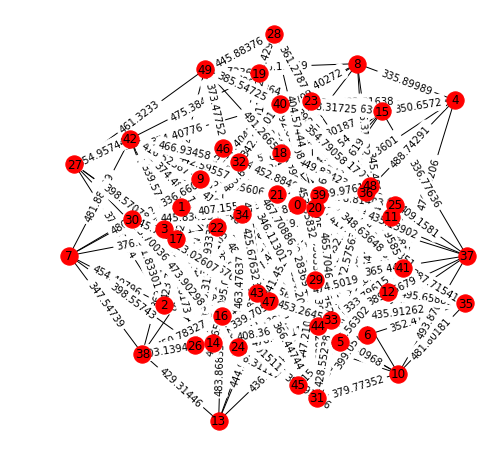

In [16]:
input_data = read_file("inputs/110.in")
number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix = data_parser(input_data)
            
G, start_index = get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix)
draw_graph(G)

[17. 16. 17. 16. 13. 17. 15.  9. 14. 16. 12. 15. 14.  9. 12. 13. 12. 15.
 14. 11. 13. 11.  8. 10.  5.  7.  8.  2. 10.  8.  6. 11.  6.  7.  1.  6.
  7.  3.  9.  4.  2.  1.  1.  1. 10.  1.  1.  1.  3.  1.]
[17. 16. 17. 15. 13. 16. 15.  8. 13. 16. 11. 14. 14.  9. 12. 13. 12. 15.
 14. 10. 12. 11.  8. 10.  5.  7.  8.  2. 10.  7.  5. 11.  6.  6.  1.  6.
  7.  3.  9.  4.  2.  1.  0.  0.  9.  0.  0.  0.  2.  1.]


(17.0, [])

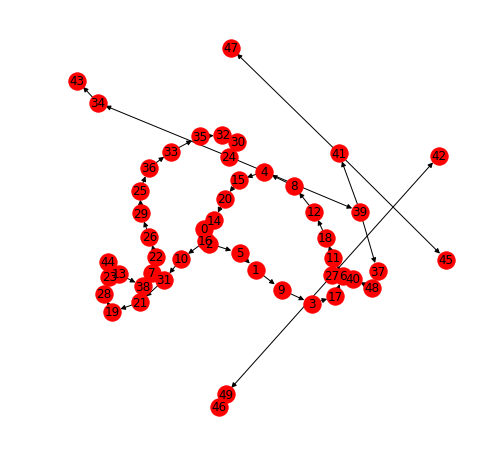

In [17]:
# find a DP solution for the tree
#http://courses.csail.mit.edu/6.006/fall09/lecture_notes/lecture21.pdf

def sparse_graph_algo(G, start_index):
    """
    This is a DP algorithm that given a tree calculate sthe 
    There are two cases:

    a) Root belongs to the vertex cover or it doesn't. In this case do 1 + size of left + size of right

    DP(v) = min. dom. set for subtree rooted at v
    DP'(v) = min. dom. set for subtree rooted at v not requiring v

    recursion

    DP(v) = min{1 + sum(DP'(c) for c in children[v]), # YES, DOMINATE the root v
                min_children{1 + sum(DP'(g) for g in children(d)) + sum(DP[c] for c new d in children[v])}}

    DP'(v) = min{1 + sum(DP'(c) for children[v]),
                 sum(DP[c] for c in children[v])}


    # I guess build everything up in post order
    """
    
    def children(v):
        return list(nx.neighbors(T, v))
    
    T = nx.dfs_tree(G, start_index)

    post_order = list(dfs_postorder_nodes(T, start_index)) # using post order to traverse the nodes so leaves are up first
    
    dp = np.zeros(len(T.nodes))
    dp_prime = np.zeros(len(T.nodes))
    
    draw_graph(T)
    
    dominating_set = []
    for v in post_order:
        # RECURSION FOR DP
        if len(children(v))>0:
            
            yes_case =  1 + sum([dp_prime[c] for c in children(v)]) # dominate that shit


            values = []

            for d in children(v):
                
                removed_d = children(v)
                removed_d.remove(d)

                to_append = 1 + sum([dp_prime[g] for g in children(d)]) + sum([dp[c] for c in removed_d])
                values.append(to_append)

            no_case = min(values) #min_d∈children[v] {1 + sum(DP'(g)for g in children[d]) + sum(DP[c] for c not equal d in children[v]))
            
            dp[v] = min(yes_case, no_case)
            
#             if dp[v] == yes_case:
#                 dominating_set.append(v)
            
            # RECURSION FOR DP'
            yes_case =  1 + sum([dp_prime[c] for c in children(v)]) # 1 + sum(DP0 [c] for c in children[v]

            no_case = sum([dp[c] for c in children(v)]) # sum(DP[c] for c in children[v])
            
            dp_prime[v] = min(yes_case, no_case)
        
        else:
            dp[v] = 1
            
    print(dp)
    print(dp_prime)
    
    return dp[start_index], dominating_set

sparse_graph_algo(G, 0)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


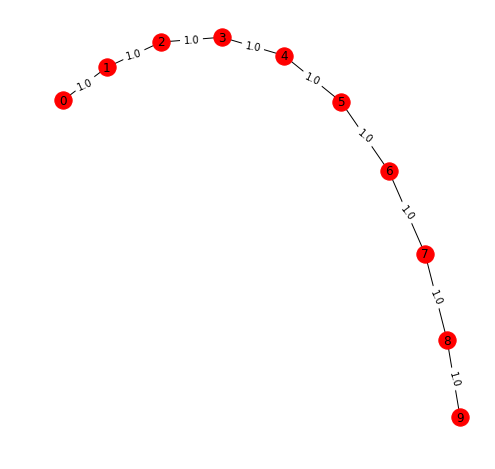

In [140]:
draw_graph(G)
for v in G.nodes():
    print(G.node[v]['conquering_cost'])

# Very simple approach

In [23]:
# find an MST. If it is a leaf, add the weight of its edge to it

def is_leaf(G, v):
    return len(list(nx.neighbors(G, v)))==1

def new_method(G, start_index):
    
    T = nx.minimum_spanning_tree(G)
    
    for v in T.nodes():
        if is_leaf(T, v):
            parent = list(nx.neighbors(T, v))[0]
            edge_weight = T.get_edge_data(v, parent)['weight']
            G.node[v]['conquering_cost'] += edge_weight
    
    nodes_to_visit = list(min_weighted_dominating_set(T, weight='conquering_cost'))
    
    if nodes_to_visit[0]==start_index and len(nodes_to_visit)==1:
        print("pipes")
        return [start_index], [start_index]
    
    ST = steinertree.steiner_tree(G, set(nodes_to_visit+[start_index]))
    
    # Find the traversal based on the Steiner tree
    traversal = find_traversal(ST, start_index)
    conquered = dict(zip(nodes_to_visit, [False]*len(nodes_to_visit)))
    to_conquer = []

    for n in traversal:
        if n in nodes_to_visit and conquered[n] == False:
            to_conquer.append(n)
            conquered[n]=True
            
    return traversal, to_conquer


 72%|███████▏  | 517/716 [05:33<02:08,  1.55it/s]

pipes


 85%|████████▍ | 606/716 [06:45<01:13,  1.50it/s]

pipes


 87%|████████▋ | 623/716 [06:53<01:01,  1.51it/s]

pipes


 91%|█████████ | 648/716 [07:09<00:45,  1.51it/s]

pipes


 93%|█████████▎| 667/716 [07:18<00:32,  1.52it/s]

pipes


100%|██████████| 716/716 [07:58<00:00,  1.50it/s]


In [59]:
from new_method_solver import *

new_method_solution_data = solve_all(new_method)

  5%|▌         | 36/716 [00:29<09:20,  1.21it/s]

KeyboardInterrupt: 

In [26]:
total_scores = []
conquering_cost = []
travelling_cost = []
filename = []

for k in new_method_solution_data:
    total_scores.append(float(new_method_solution_data[k]['total_cost']))
    conquering_cost.append(float(new_method_solution_data[k]['conquering_cost']))
    travelling_cost.append(float(new_method_solution_data[k]['travelling_cost']))
    filename.append(k)
    
import pandas as pd

new_method_result = pd.DataFrame(data = {'filename':filename, 'total_scores':total_scores, 'conquering_cost':conquering_cost, 
                     'travelling_cost':travelling_cost})
new_method_result.head()

,conquering_cost,filename,total_scores,travelling_cost
0,59213.0,inputs/234.in,1.502970e+05,9.108400e+04
1,1041521.0,inputs/374.in,7.324100e+07,7.219948e+07
2,2702.0,inputs/265.in,4.840000e+03,2.138000e+03
3,245.0,inputs/325.in,1.391000e+03,1.146000e+03
4,98.0,inputs/296.in,1.540000e+02,5.600000e+01


In [27]:
import pandas as pd
past_result = pd.read_csv("results_log/vasilis_greedy.csv")
past_result[past_result['filename']=='inputs/110.in']

,conquering_cost,filename,total_scores,travelling_cost
707,2363.90077,inputs/110.in,18214.77149,15850.87072


In [49]:
ix = past_result['total_scores']>=new_method_result['total_scores']
sum(ix)

290

In [47]:
(past_result.loc[ix, :]['total_scores']-new_method_result.loc[ix, :]['total_scores'])/past_result.loc[ix, :]['total_scores']

8      1.657397e-01
9      2.307692e-01
13     3.296873e-01
14     0.000000e+00
19     1.250000e-01
20     8.105469e-02
23     7.455625e-02
25     5.584112e-01
27     3.043478e-01
32     2.270633e-01
33     6.931964e-02
34     1.016949e-01
42     0.000000e+00
43     4.216867e-02
44     1.685393e-02
48     5.917799e-01
50     0.000000e+00
52     8.666667e-02
56     1.727197e-02
60     1.830896e-01
65     4.949495e-01
66     5.733214e-04
70     0.000000e+00
71     1.312155e-01
75     5.608108e-01
77     1.896334e-02
78     0.000000e+00
79     1.122579e-01
81     3.616891e-01
89     3.388289e-01
           ...     
648    0.000000e+00
654    3.499633e-01
657    3.571739e-01
658    5.650685e-01
660    1.030933e-01
661    3.043478e-01
665    0.000000e+00
667    2.590674e-03
670    1.165850e-01
671    1.454251e-03
672    0.000000e+00
673    1.094527e-01
675    0.000000e+00
676    4.473684e-01
677    1.428227e-16
679    9.877375e-03
680    9.420290e-02
684    5.922083e-01
686    1.086130e-01


In [5]:
def solve_all(solver):
    indirectory = "inputs/"
    outdirectory = "outputs/"
    
    #os.makedirs(outdirectory)
    
    infiles = os.listdir(indirectory)
    
    solution_data = {}
    
    for input_file in tqdm(infiles):
            input_data = read_file(indirectory+input_file)
            number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix = data_parser(input_data)
            
            G, start_index = get_G(number_of_kingdoms, list_of_kingdom_names, starting_kingdom, adjacency_matrix)
            try: 
                closed_walk, conquered_kingdoms = solver(G, start_index)
            except KeyError as e:
                print(e)
                print("Error in input file: {}".format(input_file))
            
            
            # get the score of our solution
            score, text = cost_of_solution(G, closed_walk, conquered_kingdoms)
            
            try:
                conquering_cost = re.search('\d+(\.\d{1,100000})?', text.split("\n")[0]).group(0)
                travelling_cost = re.search('\d+(\.\d{1,100000})?', text.split("\n")[1]).group(0)
                total_cost = re.search('\d+(\.\d{1,100000})?', text.split("\n")[2]).group(0)
                
                solution_data[indirectory+input_file] = {"conquering_cost":conquering_cost, "travelling_cost":travelling_cost,
                                                    "total_cost":total_cost}
            except AttributeError:
                print(indirectory+input_file)
                print(text)
       
            closed_walk = [list_of_kingdom_names[i] for i in closed_walk]
            conquered_kingdoms = [list_of_kingdom_names[i] for i in conquered_kingdoms]
            

            output_file = outdirectory + input_file[:-3] +".out"
            write_data_to_file(output_file, closed_walk, ' ')
            write_to_file(output_file, '\n', append=True)
            write_data_to_file(output_file, conquered_kingdoms, ' ', append=True)
            
    return solution_data

In [10]:
#simple_solution_data = solve_all(simple)

,conquering_cost,filename,total_scores,travelling_cost
0,67418.0,inputs/234.in,1.012580e+05,3.384000e+04
1,866024.0,inputs/374.in,5.723158e+07,5.636556e+07
2,4614.0,inputs/265.in,6.008000e+03,1.394000e+03
3,170.0,inputs/325.in,1.078000e+03,9.080000e+02
4,22.0,inputs/296.in,3.400000e+01,1.200000e+01


In [28]:
past_result = pd.read_csv("results_log/vasilis_greedy.csv")
past_result.head()

,conquering_cost,filename,total_scores,travelling_cost
0,24654.0,inputs/234.in,1.024940e+05,7.784000e+04
1,674538.0,inputs/374.in,6.039820e+07,5.972367e+07
2,2600.0,inputs/265.in,4.576000e+03,1.976000e+03
3,295.0,inputs/325.in,1.341000e+03,1.046000e+03
4,5.0,inputs/296.in,2.100000e+01,1.600000e+01


In [23]:
simple_result['total_scores'][0]

'101258.0'

In [1]:
from simple_solver import *